# Centrality

In [1]:
cd ~/thesis

/home/jovyan/thesis


/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Import libraries

In [2]:
import numpy as np
import pandas as pd
import networkx as nx

# Modify eliorc's implementation
from eliorc_mod.node2vec import Node2Vec
from gensim.models import Word2Vec

from main_utils import *
from plot_utils import *
from analysis_utils import *

/tmp/ipykernel_473/573104159.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


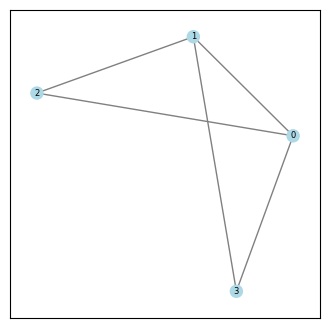

In [4]:
G = nx.Graph([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3)])
plot_graph(G)

In [5]:
nx.degree_centrality(G)

{0: 1.0, 1: 1.0, 2: 0.6666666666666666, 3: 0.6666666666666666}

## Generation

### Stochastic Block Model

In [ ]:
initial_graph = nx.erdos_renyi_graph(15, 0.25, seed=42)
plot_graph(initial_graph)

In [ ]:
bet_centr_dict = nx.betweenness_centrality(initial_graph)
bet_centr_df = pd.DataFrame(list(bet_centr_dict.items()), columns=['node_id', 'centrality'])
bet_centr_df.sort_values(by='centrality', ascending=False).reset_index(drop=True)

In [ ]:
?? nx.betweenness_centrality_subset

In [ ]:
max_bet_cent_node = max(bet_centr_dict, key=bet_centr_dict.get)

In [ ]:
max_bet_cent_node

In [ ]:
bet_centr_dict

In [ ]:
graph, remove_nodes_edges_dict = remove_nodes_connected(initial_graph, 5, removal_process='betweenness_centrality')

In [ ]:
plot_graph(initial_graph)

In [ ]:
plot_graph(graph)

In [ ]:
remove_nodes_edges_dict

### PPI

In [7]:
initial_graph, group_df = mat_load_func('datasets/PPI/PPI.mat')
initial_graph.name = 'PPI'

In [8]:
advanced_info(initial_graph)

Graph Information:
Number of nodes: 3890
Number of edges: 38739
Density: 0.005121425469371459
Is connected: False
Average clustering coefficient: 0.14644876266464119
Directed: False


Around 8-9 minutes to calculate it

In [ ]:
bet_centr_dict = nx.betweenness_centrality(initial_graph)
bet_centr_df = pd.DataFrame(list(bet_centr_dict.items()), columns=['node_id', 'centrality'])
bet_centr_df.sort_values(by='centrality', ascending=False).reset_index(drop=True)

In [ ]:
graph, remove_nodes_edges_dict = remove_nodes_connected(initial_graph, 2, removal_process='betweenness_centrality')

In [ ]:
new_graph, new_remove_nodes_edges_dict = remove_nodes_connected(initial_graph, 2, removal_process='betweenness_centrality')

It finished in 8 minutes when we set k=100

In [ ]:
new_graph, new_remove_nodes_edges_dict = remove_nodes_connected(initial_graph, 2, removal_process='betweenness_centrality')

### Trying with nxp

In [9]:
import nx_parallel as nxp

In [10]:
advanced_info(initial_graph)

Graph Information:
Number of nodes: 3890
Number of edges: 38739
Density: 0.005121425469371459
Is connected: False
Average clustering coefficient: 0.14644876266464119
Directed: False


In [11]:
bet_centr_dict = nxp.betweenness_centrality(initial_graph, k=100)
bet_centr_df = pd.DataFrame(list(bet_centr_dict.items()), columns=['node_id', 'centrality'])
bet_centr_df.sort_values(by='centrality', ascending=False).reset_index(drop=True)

,node_id,centrality
0,3630,0.119515
1,1219,0.046365
2,291,0.034905
3,824,0.034823
4,3361,0.033478
...,...,...
3885,3481,0.000000
3886,1228,0.000000
3887,910,0.000000
3888,2268,0.000000


It took 1.5 minutes to calculate it in parallel for num_nodes=2 with centrality while it takes half a minute for 128 randomly.

In [14]:
new_graph, new_remove_nodes_edges_dict = remove_nodes_connected(initial_graph, 2, removal_process='betweenness_centrality')

### BlogCatalog

In [11]:
blog_dir = 'datasets/blog_catalog/data/'

initial_graph = nx.read_edgelist(blog_dir+'edges.csv', delimiter=',')
initial_graph.name = 'blog_catalog'

# Groups mapping
group_df = pd.read_csv(blog_dir+'group-edges.csv', delimiter=',')
group_df.columns = ['node_num', 'group']

In [ ]:
centrality = nx.degree_centrality(initial_graph)

In [15]:
node = max(centrality, key=centrality.get)

In [17]:
centrality[node]

0.38715934438948696

In [22]:
graph, remove_nodes_edges_dict = remove_nodes_connected(initial_graph, 16, removal_process='degree_centrality')

In [23]:
graph, remove_nodes_edges_dict = remove_nodes_connected(initial_graph, 16, removal_process='random')

## Comparison

In [4]:
results_df = pd.read_csv('results.csv')

In [5]:
results_df.head(10)

,dataset,nodes,edges,retraining_type,metric,10%,20%,30%,40%,50%,...,70%,80%,90%,parameters,training_time,dynamic_update,num_different_nodes,num_starting_nodes,removal_process,execution_timestamp
0,PPI,3890,38739,global,macro,0.085952,0.072052,0.081977,0.089873,0.087135,...,0.064754,0.063289,0.040925,"(128, 40, 80, 0.25, 1)",219.054698,prune,512,2972,degree_centrality,18/07/2024 - 14:52
1,PPI,3890,38739,global,micro,0.133136,0.121302,0.116371,0.122781,0.115453,...,0.095137,0.090270,0.059849,"(128, 40, 80, 0.25, 1)",219.054698,prune,512,2972,degree_centrality,18/07/2024 - 14:52
2,PPI,3890,38739,local,macro,0.054119,0.071297,0.085033,0.085455,0.080754,...,0.071808,0.061188,0.047507,"(128, 40, 80, 0.25, 1)",42.793524,prune,512,2972,degree_centrality,18/07/2024 - 14:52
3,PPI,3890,38739,local,micro,0.097686,0.105398,0.116438,0.118895,0.110026,...,0.106828,0.099614,0.087689,"(128, 40, 80, 0.25, 1)",42.793524,prune,512,2972,degree_centrality,18/07/2024 - 14:52
4,wikipedia,4777,92517,global,macro,0.036618,0.043872,0.043830,0.043829,0.039620,...,0.042098,0.042659,0.036916,"(128, 40, 80, 0.25, 1)",698.351662,prune,512,4777,betweenness_centrality,18/07/2024 - 14:42
5,wikipedia,4777,92517,global,micro,0.437939,0.464244,0.464844,0.458382,0.442569,...,0.410248,0.400938,0.377963,"(128, 40, 80, 0.25, 1)",698.351662,prune,512,4777,betweenness_centrality,18/07/2024 - 14:42
6,wikipedia,4777,92517,local,macro,0.049548,0.060786,0.039719,0.034608,0.033228,...,0.034788,0.035353,0.034175,"(128, 40, 80, 0.25, 1)",172.945279,prune,512,4777,betweenness_centrality,18/07/2024 - 14:42
7,wikipedia,4777,92517,local,micro,0.485356,0.459205,0.449093,0.456829,0.439514,...,0.419258,0.410256,0.390930,"(128, 40, 80, 0.25, 1)",172.945279,prune,512,4777,betweenness_centrality,18/07/2024 - 14:42
8,wikipedia,4777,92517,global,macro,0.069780,0.061717,0.048079,0.035819,0.038611,...,0.050014,0.034446,0.037771,"(128, 40, 80, 0.25, 1)",682.652340,prune,512,4777,degree_centrality,18/07/2024 - 12:45
9,wikipedia,4777,92517,global,micro,0.477752,0.473623,0.465625,0.449004,0.451946,...,0.416946,0.406800,0.387861,"(128, 40, 80, 0.25, 1)",682.652340,prune,512,4777,degree_centrality,18/07/2024 - 12:45


In [6]:
param_df = results_df.loc[results_df['parameters'] == '(128, 40, 80, 0.25, 1)']

In [7]:
# These are the parameters for calculating the gloal/local difference
config = {'dynamic_update': 'prune',
          'retraining_type': 'local',
          'metric': 'macro',
          'parameters': '(128, 40, 80, 0.25, 1)',
          'num_different_nodes': 512}

In [8]:
sub_df = accu_time_df_gen(param_df, config)

In [9]:
sub_df

,dataset,retraining_type,parameters,dynamic_update,removal_process,average_accuracy,training_time
0,PPI,local,"(128, 40, 80, 0.25, 1)",prune,degree_centrality,0.069418,42.793524
1,wikipedia,local,"(128, 40, 80, 0.25, 1)",prune,betweenness_centrality,0.039392,172.945279
2,wikipedia,local,"(128, 40, 80, 0.25, 1)",prune,degree_centrality,0.033993,181.304677
3,cora,local,"(128, 40, 80, 0.25, 1)",prune,degree_centrality,0.613932,11.665169
4,PPI,local,"(128, 40, 80, 0.25, 1)",prune,betweenness_centrality,0.069948,50.187979
5,cora,local,"(128, 40, 80, 0.25, 1)",prune,betweenness_centrality,0.658202,9.899643
6,PPI,local,"(128, 40, 80, 0.25, 1)",prune,random,0.078023,68.855529
7,blog_catalog,local,"(128, 40, 80, 0.25, 1)",prune,random,0.198408,1480.310039
8,blog_catalog,local,"(128, 40, 80, 0.25, 1)",prune,random,0.196315,1494.013343
9,wikipedia,local,"(128, 40, 80, 0.25, 1)",prune,random,0.094717,826.445227


In [10]:
# all_stats_dict = {key:[] for key in sub_df['removal_process'].unique()}

In [11]:
for process in all_stats_dict:

    for dataset in sub_df['dataset'].unique():

        new_df = sub_df

        config['dataset'] = dataset
        config['removal_process'] = process

        for key in config:
            new_df = new_df[new_df.loc[:, key] == config[key]]

        print(dataset, new_df['average_accuracy'].values[0])
        
        # new_df = accu_time_df_gen(sub_df, config)

        # print(dataset, new_df['average_accuracy'].values[0])

        # avg_accuracy = sub_df[]

        # all_stats_dict[process].update({dataset: (avg_accuracy_diff_perc, training_time_diff_perc)})

NameError: name 'all_stats_dict' is not defined

In [19]:
def dataset_removal_plot(sub_df):
    '''
        Plots the average accuracy for every dataset and for
        different node removal processes
    '''

    # Set font to Computer Modern
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Computer Modern'
    plt.rcParams['text.usetex'] = True  # Use LaTeX for rendering text

    # # Plotting parameters
    # labels = sub_df['dataset'].unique()

    # Define the order of datasets
    labels = ['blog_catalog', 'wikipedia', 'PPI', 'cora']
    removal_processes = sub_df['removal_process'].unique()
    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    # Create the figure and the axes
    fig, ax = plt.subplots() #figsize=(12, 8))

    # Plot bars for each removal process
    for i, removal_process in enumerate(removal_processes):
        # Filter data for the current removal process
        filtered_data = sub_df[sub_df['removal_process'] == removal_process]
        accuracy_values = [filtered_data[filtered_data['dataset'] == label]['average_accuracy'].values[0] if label in filtered_data['dataset'].values else 0 for label in labels]
        
        # Plot the bars
        rects = ax.bar(x + i * width - (len(removal_processes) / 2) * width, accuracy_values, width, label=removal_process)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    # ax.set_xlabel('Dataset', fontdict={'size': 20})
    # ax.set_ylabel('Average Accuracy', fontdict={'size': 20})
    # ax.set_title('Average Accuracy by Dataset and Removal Process')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=16)
    ax.set_ylim([0, 1])
    ax.legend()

    # Reverse the legend items
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1])

    # Add grid
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)

    # Adjust the legend
    plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.3))

    # Adjust spacing and save the plot
    plt.tight_layout()
    plt.savefig('figures/accuracy_by_dataset_removal_process.svg', dpi=100, bbox_inches='tight')
    plt.savefig('figures/accuracy_by_dataset_removal_process.pdf', dpi=100, bbox_inches='tight')

    # Show the plot
    plt.show()

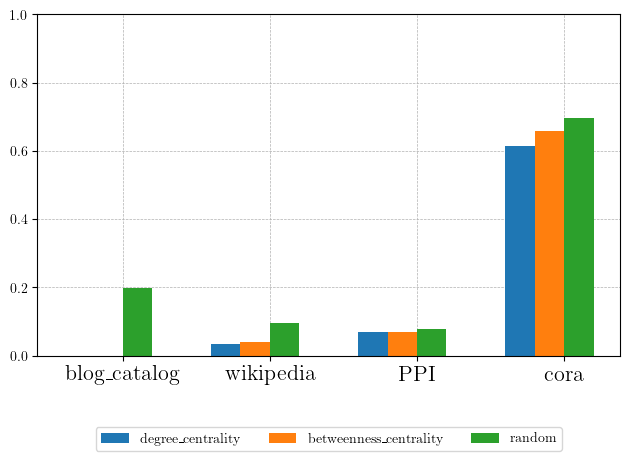

In [20]:
dataset_removal_plot(sub_df)